In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mnist

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import keras
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [6]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [7]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [9]:
%%time
model.fit(train_images, 
          to_categorical(train_labels), 
          epochs=5, 
          batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 1s 583us/step - loss: 0.3612 - accuracy: 0.8918
Epoch 2/5
1875/1875 [==============================] - 1s 574us/step - loss: 0.1911 - accuracy: 0.9420
Epoch 3/5
1875/1875 [==============================] - 1s 573us/step - loss: 0.1480 - accuracy: 0.9545
Epoch 4/5
1875/1875 [==============================] - 1s 574us/step - loss: 0.1234 - accuracy: 0.9619
Epoch 5/5
1875/1875 [==============================] - 1s 571us/step - loss: 0.1073 - accuracy: 0.9661
CPU times: total: 21.1 s
Wall time: 5.66 s


In [10]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 454us/step - loss: 0.1199 - accuracy: 0.9613


[0.11993402242660522, 0.9613000154495239]

In [11]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

In [12]:
predictions = model.predict(test_images[:5])

1/1 [==============================] - 0s 37ms/step


In [13]:
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [14]:
# влияение количества слоев на точность

In [15]:
losses = [0] * 10
accuracy = [0] * 10

In [16]:
for i in range(10):
    # Формируем массив промежуточных слоев.
    laers =[Dense(64, activation='relu', input_shape=(784,))]
    for j in range(i):
        laers.append(Dense(64, activation='relu'))
    laers.append(Dense(10, activation='softplus'))
    model = Sequential(laers)

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=5, 
        batch_size=32,
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i] = result[0]
    accuracy[i] = result[1]
    
    print(i, ': loss - ', losses[i], ', accuracy: ', accuracy[i])

313/313 [==============================] - 0s 438us/step - loss: 0.1305 - accuracy: 0.9617
0 : loss -  0.13050074875354767 , accuracy:  0.9617000222206116
313/313 [==============================] - 0s 457us/step - loss: 0.1306 - accuracy: 0.9611
1 : loss -  0.13064685463905334 , accuracy:  0.9610999822616577
313/313 [==============================] - 0s 447us/step - loss: 0.1088 - accuracy: 0.9663
2 : loss -  0.10881490260362625 , accuracy:  0.9663000106811523
313/313 [==============================] - 0s 454us/step - loss: 0.1165 - accuracy: 0.9639
3 : loss -  0.1164962500333786 , accuracy:  0.9639000296592712
313/313 [==============================] - 0s 460us/step - loss: 0.1200 - accuracy: 0.9609
4 : loss -  0.12004020065069199 , accuracy:  0.9609000086784363
313/313 [==============================] - 0s 495us/step - loss: 0.1459 - accuracy: 0.9566
5 : loss -  0.14594708383083344 , accuracy:  0.95660001039505
313/313 [==============================] - 0s 495us/step - loss: 0.1453 -

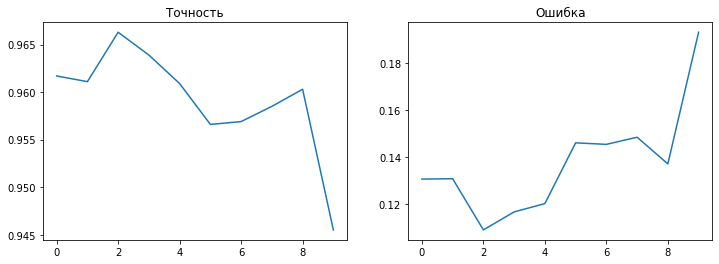

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

In [18]:
# самый лучший 1 скрытый слой

In [19]:
# количество нейронов в скрытом слое

In [20]:
losses = [0] * 40
accuracy = [0] * 40

In [21]:
for i in range(40):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)), 
        Dense(i + 1, activation='relu'), 
        Dense(10, activation='softplus')]
    )

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=5, 
        batch_size=32,
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i - 1] = result[0]
    accuracy[i - 1] = result[1]
    
    print(i + 1, ' нейронов: loss - ', result[0], ', accuracy: ', result[1])

313/313 [==============================] - 0s 447us/step - loss: 1.3662 - accuracy: 0.5089
1  нейронов: loss -  1.3661752939224243 , accuracy:  0.508899986743927
313/313 [==============================] - 0s 447us/step - loss: 0.5314 - accuracy: 0.8840
2  нейронов: loss -  0.5314294099807739 , accuracy:  0.8840000033378601
313/313 [==============================] - 0s 466us/step - loss: 0.2720 - accuracy: 0.9272
3  нейронов: loss -  0.2719917297363281 , accuracy:  0.9272000193595886
313/313 [==============================] - 0s 472us/step - loss: 0.2781 - accuracy: 0.9307
4  нейронов: loss -  0.2780960500240326 , accuracy:  0.9307000041007996
313/313 [==============================] - 0s 502us/step - loss: 0.2027 - accuracy: 0.9387
5  нейронов: loss -  0.20272324979305267 , accuracy:  0.9387000203132629
313/313 [==============================] - 0s 482us/step - loss: 0.2026 - accuracy: 0.9414
6  нейронов: loss -  0.20256058871746063 , accuracy:  0.9413999915122986
313/313 [============

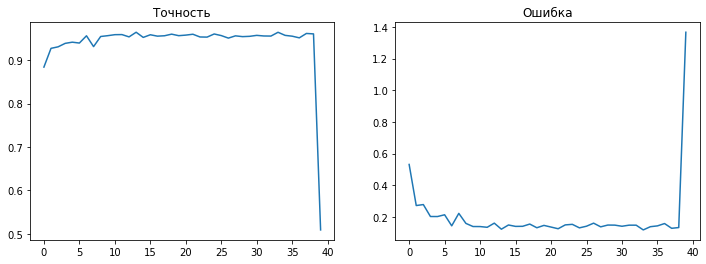

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

In [23]:
print(f'Оптимальное количество нейронов в слое по точности: {accuracy.index(max(accuracy))}')
print(f'Оптимальное количество нейронов в слое по ошибке: {losses.index(min(losses))}')

Оптимальное количество нейронов в слое по точности: 13
Оптимальное количество нейронов в слое по ошибке: 33


In [24]:
# Для уверенной работы нейронной сети достаточно 6-8 нейронов 

In [25]:
# количество эпох

In [26]:
losses = [0] * 40
accuracy = [0] * 40

In [27]:
for i in range(40):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(784,)), 
        Dense(8, activation='relu'), 
        Dense(10, activation='softplus')]
    )

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    model.fit(
        train_images, 
        to_categorical(train_labels), 
        epochs=i + 1, 
        verbose=0
    )

    result = model.evaluate(test_images, to_categorical(test_labels))
    losses[i] = result[0]
    accuracy[i] = result[1]
    
    print(i + 1, ' эпох: loss - ', result[0], ', accuracy: ', result[1])

313/313 [==============================] - 0s 482us/step - loss: 0.2820 - accuracy: 0.9205
1  эпох: loss -  0.28198644518852234 , accuracy:  0.9204999804496765
313/313 [==============================] - 0s 470us/step - loss: 0.2154 - accuracy: 0.9362
2  эпох: loss -  0.21542009711265564 , accuracy:  0.9362000226974487
313/313 [==============================] - 0s 482us/step - loss: 0.1853 - accuracy: 0.9451
3  эпох: loss -  0.18527473509311676 , accuracy:  0.9451000094413757
313/313 [==============================] - 0s 463us/step - loss: 0.1784 - accuracy: 0.9444
4  эпох: loss -  0.17837932705879211 , accuracy:  0.9444000124931335
313/313 [==============================] - 0s 469us/step - loss: 0.2241 - accuracy: 0.9290
5  эпох: loss -  0.2240513116121292 , accuracy:  0.9290000200271606
313/313 [==============================] - 0s 486us/step - loss: 0.1709 - accuracy: 0.9502
6  эпох: loss -  0.17090299725532532 , accuracy:  0.9502000212669373
313/313 [==============================] 

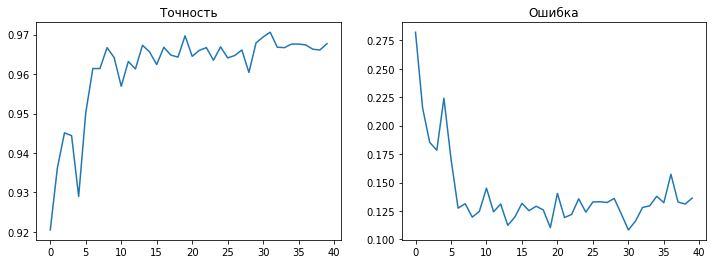

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(accuracy)
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Ошибка')

plt.show()

In [37]:
# 15 эпох достаточно

In [38]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)), 
    Dense(8, activation='relu'), 
    Dense(10, activation='softplus')]
)

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(
    train_images, 
    to_categorical(train_labels), 
    epochs=15
)

model.evaluate(test_images, to_categorical(test_labels))

Epoch 1/15
1875/1875 [==============================] - 2s 669us/step - loss: 0.5336 - accuracy: 0.8387
Epoch 2/15
1875/1875 [==============================] - 1s 625us/step - loss: 0.2326 - accuracy: 0.9312
Epoch 3/15
1875/1875 [==============================] - 1s 622us/step - loss: 0.1835 - accuracy: 0.9464
Epoch 4/15
1875/1875 [==============================] - 1s 619us/step - loss: 0.1544 - accuracy: 0.9549
Epoch 5/15
1875/1875 [==============================] - 1s 621us/step - loss: 0.1385 - accuracy: 0.9593
Epoch 6/15
1875/1875 [==============================] - 1s 616us/step - loss: 0.1230 - accuracy: 0.9640
Epoch 7/15
1875/1875 [==============================] - 1s 617us/step - loss: 0.1152 - accuracy: 0.9655
Epoch 8/15
1875/1875 [==============================] - 1s 621us/step - loss: 0.1028 - accuracy: 0.9681
Epoch 9/15
1875/1875 [==============================] - 1s 621us/step - loss: 0.1005 - accuracy: 0.9699
Epoch 10/15
1875/1875 [==============================] - 1s 620u

[0.11528655141592026, 0.9688000082969666]

2 Задание

In [31]:
# summary вывод сводки по модели

In [32]:
# add добавить новый слой в модель

In [33]:
# clone_model

In [34]:

model.summary()

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_308 (Dense)           (None, 64)                50240     
                                                                 
 dense_309 (Dense)           (None, 8)                 520       
                                                                 
 dense_310 (Dense)           (None, 10)                90        
                                                                 
Total params: 50,850
Trainable params: 50,850
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(Dense(64, activation='relu'))

In [36]:
keras.models.clone_model(model)